# Thực hành Xử lý ảnh số

## Bài tập tăng cường LAB 3 

### Bài 1: Chọn ảnh quả kiwi bất kì .Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới. Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin. Lưu ảnh kết quả vào file kiwi_wave.jpg

(1414, 2119, 3)


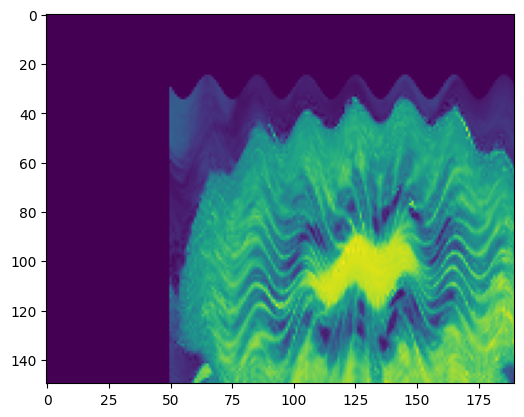

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
bmg = data [120:270, 130:320]
print (data.shape)
iio.imsave('kiwi.jpg', bmg)
data = iio.imread('kiwi.jpg', mode ='L')
# Tịnh tiến ảnh kiwi 50 pixel sang phải, 30 pixel xuống dưới
bdata = nd.shift (data, shift=(30, 50), order=0)
# Tạo hiệu ứng sóng bằng sin với map_coordinates
rows, cols = bdata.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
# Thêm hiệu ứng sóng vào tọa độ y
# A: biên độ sóng, f: tần số
A , f = 5, 0.05
y_wave = y + A * np.sin(2 * np.pi * f * x)

# Áp dụng map_coordinates để biến đổi theo tọa độ sóng
coords = np.array([y_wave, x])
wave_img = nd.map_coordinates(bdata, coords, order=1, mode='reflect')

# Lưu ảnh kết quả
iio.imsave('kiwi_wave.jpg', wave_img.astype(np.uint8))
plt.imshow (wave_img)
# plt.imshow(bmg)
plt.show ()




### Bài 2: Chọn quả đu đủ và dưa hấu từ google. Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím. Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

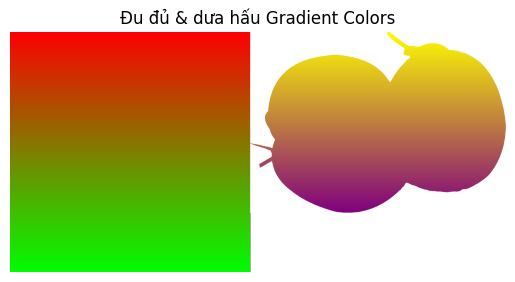

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# === 1. Đọc ảnh đu đủ và dưa hấu với kênh alpha ===
dudu_img = Image.open('dudu_gg.webp').convert("RGBA")
duahau_img = Image.open('duahau_gg.png').convert("RGBA")

dudu_np = np.array(dudu_img)
duahau_np = np.array(duahau_img)

# === 2. Hàm tạo gradient theo chiều dọc ===
def apply_vertical_gradient(img_np, color_start, color_end):
    h, w, _ = img_np.shape
    gradient_img = img_np.copy()
    for y in range(h):
        alpha = y / h
        r = int((1 - alpha) * color_start[0] + alpha * color_end[0])
        g = int((1 - alpha) * color_start[1] + alpha * color_end[1])
        b = int((1 - alpha) * color_start[2] + alpha * color_end[2])
        for x in range(w):
            if gradient_img[y, x, 3] > 0:
                gradient_img[y, x, 0] = r
                gradient_img[y, x, 1] = g
                gradient_img[y, x, 2] = b
    return gradient_img

# === 3. Áp dụng gradient ===
dudu_grad = apply_vertical_gradient(dudu_np, (255, 0, 0), (0, 255, 0))         # đỏ → xanh lá
duahau_grad = apply_vertical_gradient(duahau_np, (255, 255, 0), (128, 0, 128)) # vàng → tím

# === 4. Ghép ảnh trên nền trong suốt ===
h = max(dudu_grad.shape[0], duahau_grad.shape[0])
w = dudu_grad.shape[1] + duahau_grad.shape[1]
bg = np.zeros((h, w, 4), dtype=np.uint8)

# Dán từng ảnh vào nền
bg[0:dudu_grad.shape[0], 0:dudu_grad.shape[1]] = dudu_grad
x_offset = dudu_grad.shape[1]
bg[0:duahau_grad.shape[0], x_offset:x_offset + duahau_grad.shape[1]] = duahau_grad

# === 5. Lưu và hiển thị ảnh bằng matplotlib ===
result_img = Image.fromarray(bg, 'RGBA')
result_img.save('dudu_duahau_gradient.png')

# Hiển thị bằng matplotlib
plt.imshow(result_img)
plt.axis('off')
plt.title('Đu đủ & dưa hấu Gradient Colors')
plt.show()


### Bài 3: Chọn ảnh núi và thuyền .Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False). Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

(605, 1021, 3)


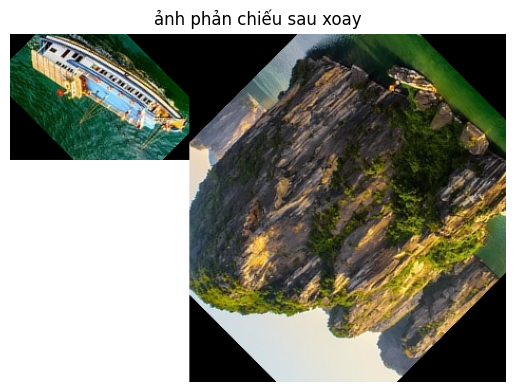

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('exercise/quang_ninh.jpg')
# cắt vùng chứa thuyền và núi
bmg1 = data [430:550,490:660]
bmg2 = data [20:350, 400:700]
print(data.shape)
# xoay ảnh chiếc thuyền và lưu
d1_rot = nd.rotate (bmg1, 45, reshape=False)
# xoay ảnh núi và lưu
d2_rot = nd.rotate (bmg2, 45, reshape=False)
# Tạo hiệu ứng phản chiếu dọc (lật theo chiều dọc)
d1 = np.flipud(d1_rot)
d2 = np.flipud(d2_rot)

#  Tạo canvas trắng đủ để ghép d1 và d2 cạnh nhau
h = max(d1.shape[0], d2.shape[0])
w = d1.shape[1] + d2.shape[1]
canvas = np.ones((h, w, 3), dtype=np.uint8) * 255  # nền trắng

# 6. Ghép d1 (thuyền) bên trái
canvas[0:d1.shape[0], 0:d1.shape[1]] = d1

# 7. Ghép d2 (núi) bên phải
canvas[0:d2.shape[0], d1.shape[1]:d1.shape[1]+d2.shape[1]] = d2

# 8. Lưu và hiển thị
iio.imsave('mountain_boat_mirror.jpg', canvas)

plt.imshow(canvas)
plt.axis('off')
plt.title('ảnh phản chiếu sau xoay')
plt.show()


### Bài 4: Chọn ngôi chùa bất kì.Phóng to ngôi chùa lên 5 lần. Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa. Lưu ảnh kết quả vào pagoda_warped.jpg.

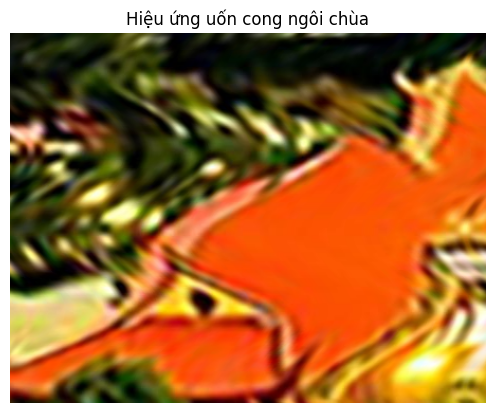

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

#  Đọc ảnh đã zoom (hoặc bạn có thể lấy lại ảnh nhỏ và zoom lại tại đây)
data = iio.imread('pagoda_zoom5.jpg')
# Lấy kích thước ảnh
h, w, c = data.shape
# Tạo lưới tọa độ gốc
x, y = np.meshgrid(np.arange(w), np.arange(h))
# Tạo biến dạng (warping) theo hàm sin
# Làm cong theo chiều ngang (x) → dịch x theo sin của y
amplitude = 20    # biên độ uốn cong
frequency = 2 * np.pi / 150  # tần số sóng

# Tính x mới bằng cách cộng thêm giá trị uốn cong
x_warped = x + amplitude * np.sin(frequency * y)
y_warped = y  # giữ y không đổi

# Áp dụng biến đổi tọa độ
warped = np.zeros_like(data)
for i in range(c):  # áp dụng từng kênh màu
    warped[..., i] = nd.map_coordinates(data[..., i], [y_warped, x_warped], order=1, mode='reflect')

# Lưu và hiển thị kết quả
iio.imsave('pagoda_warped.jpg', warped)

plt.imshow(warped)
plt.axis('off')
plt.title('Hiệu ứng uốn cong ngôi chùa')
plt.show()


### Bài 5:Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau: Tịnh tiến (hỏi số pixel di chuyển theo x và y). Xoay (hỏi góc xoay và chọn reshape=True/False).Phóng to/thu nhỏ (hỏi hệ số zoom). Làm mờ Gaussian (hỏi giá trị sigma). Biến đổi sóng (hỏi biên độ sóng). Người dùng chọn ảnh từ 3 ảnh bất kì

== Nhập đường dẫn 3 ảnh bất kỳ (vd: exercise/pagoda.jpg) ==

== Chọn ảnh để xử lý ==
1. C:\Users\Admin\OneDrive\Hình ảnh\Saved Pictures\✯✯Shōyō Hinata and Tobio Kageyama✯✯ GGHimSELF✯✯.jpg
2. C:\Users\Admin\OneDrive\Hình ảnh\Saved Pictures\1cee06c0-b76f-4e35-86fe-7b2081b76fcd.jpg
3. C:\Users\Admin\OneDrive\Hình ảnh\Saved Pictures\0d7d5ca8-8c63-4c1f-9c67-85088536b377.jpg

== MENU ==
1. Tịnh tiến
2. Xoay
3. Zoom
4. Gaussian Blur
5. Hiệu ứng sóng
0. Thoát
 Lưu vào: output\1cee06c0-b76f-4e35-86fe-7b2081b76fcd_rotate_1_False.jpg


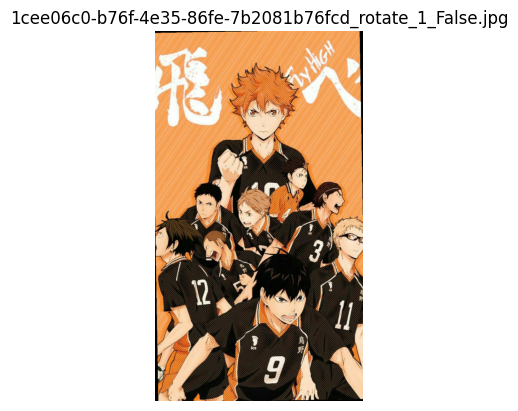


== MENU ==
1. Tịnh tiến
2. Xoay
3. Zoom
4. Gaussian Blur
5. Hiệu ứng sóng
0. Thoát
 Lưu vào: output\1cee06c0-b76f-4e35-86fe-7b2081b76fcd_tinhTien_25_35.jpg


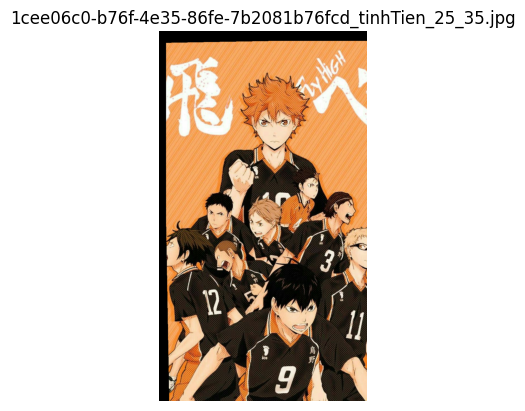


== MENU ==
1. Tịnh tiến
2. Xoay
3. Zoom
4. Gaussian Blur
5. Hiệu ứng sóng
0. Thoát
 Lưu vào: output\1cee06c0-b76f-4e35-86fe-7b2081b76fcd_zoom_2.0.jpg


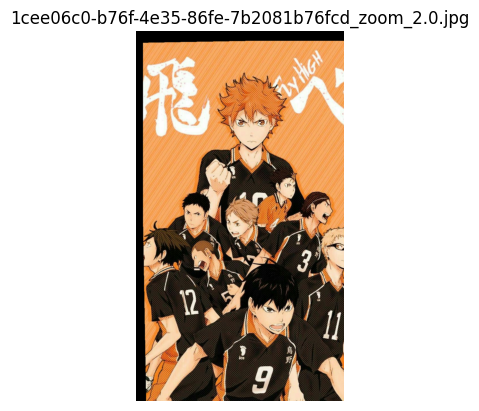


== MENU ==
1. Tịnh tiến
2. Xoay
3. Zoom
4. Gaussian Blur
5. Hiệu ứng sóng
0. Thoát
 Lưu vào: output\1cee06c0-b76f-4e35-86fe-7b2081b76fcd_gauss_2.0.jpg


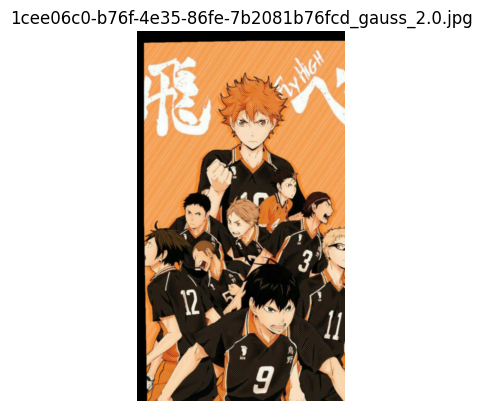


== MENU ==
1. Tịnh tiến
2. Xoay
3. Zoom
4. Gaussian Blur
5. Hiệu ứng sóng
0. Thoát
 Lưu vào: output\1cee06c0-b76f-4e35-86fe-7b2081b76fcd_wave_35.0.jpg


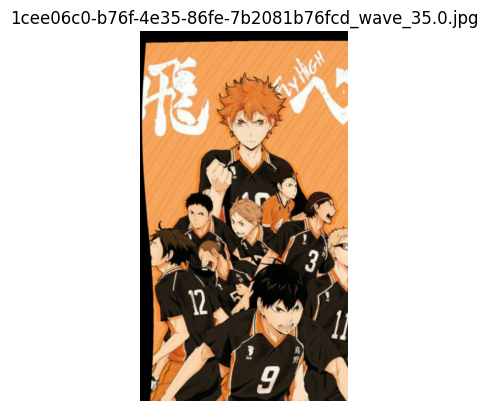


== MENU ==
1. Tịnh tiến
2. Xoay
3. Zoom
4. Gaussian Blur
5. Hiệu ứng sóng
0. Thoát
Thoát.


In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import os

def tinhTien(img):
    dx = int(input("  Dịch theo X: "))
    dy = int(input("  Dịch theo Y: "))
    shift = (dy, dx, 0) if img.ndim == 3 else (dy, dx)
    return nd.shift(img, shift, order=0), f"tinhTien_{dx}_{dy}.jpg"

def rotate(img):
    angle = float(input("  Góc xoay: "))
    reshape = input("  reshape=True? (y/n): ").strip().lower() == 'y'
    return nd.rotate(img, angle, reshape=reshape), f"rotate_{int(angle)}_{reshape}.jpg"

def zoom(img):
    z = float(input("  Hệ số zoom: "))
    zoom_factors = (z, z, 1) if img.ndim == 3 else (z, z)
    return nd.zoom(img, zoom_factors), f"zoom_{z}.jpg"

def gaussian_blur(img):
    sigma = float(input("  Sigma: "))
    if img.ndim == 3:
        blurred = np.stack([nd.gaussian_filter(img[..., i], sigma) for i in range(3)], axis=-1)
    else:
        blurred = nd.gaussian_filter(img, sigma)
    return blurred, f"gauss_{sigma}.jpg"

def wave_warp(img):
    A = float(input("  Biên độ sóng: "))
    h, w = img.shape[:2]
    y, x = np.indices((h, w))
    x_new = x + A * np.sin(2 * np.pi * y / h)
    coords = [y, x_new]
    if img.ndim == 3:
        warped = np.zeros_like(img)
        for i in range(3):
            warped[..., i] = nd.map_coordinates(img[..., i], coords, order=1, mode='reflect')
    else:
        warped = nd.map_coordinates(img, coords, order=1, mode='reflect')
    return warped, f"wave_{A}.jpg"
def choose_image():
    print("== Nhập đường dẫn 3 ảnh bất kỳ (vd: exercise/pagoda.jpg) ==")
    paths = [] # Hiển thị yêu cầu nhập 3 đường dẫn ảnh
    for i in range(3):
        path = input(f"Nhập ảnh {i+1}: ").strip()  
        if not os.path.isfile(path): # Kiểm tra file tồn tại
            raise FileNotFoundError(f"Không tìm thấy: {path}")
        paths.append(path)

    print("\n== Chọn ảnh để xử lý ==") # Hiển thị lại các ảnh đã nhập để người dùng chọn
    for i, p in enumerate(paths, 1):
        print(f"{i}. {p}")

    while True:
        idx = input("Chọn (1-3): ").strip()
        if idx in {"1", "2", "3"}:
              # Trả về ảnh đã đọc bằng imageio và tên file (không đuôi mở rộng)
            path = paths[int(idx)-1]
            return iio.imread(path), os.path.splitext(os.path.basename(path))[0]
        else:
            print(" Vui lòng chọn 1, 2 hoặc 3.")


def show_and_save(img, out_name):
    output_dir = "output"
    os.makedirs(output_dir, exist_ok=True)  # Tạo thư mục nếu chưa có

    full_path = os.path.join(output_dir, out_name)
    iio.imsave(full_path, img)
    print(f" Lưu vào: {full_path}")

    plt.imshow(img)
    plt.axis('off')
    plt.title(out_name)
    plt.show()

def main():
    img, base = choose_image()

    while True:
        print("\n== MENU ==")
        print("1. Tịnh tiến")
        print("2. Xoay")
        print("3. Zoom")
        print("4. Gaussian Blur")
        print("5. Hiệu ứng sóng")
        print("0. Thoát")
        choice = input("Chọn thao tác: ").strip()

        match choice:
            case "1":
                result, fname = tinhTien(img)
            case "2":
                result, fname = rotate(img)
            case "3":
                result, fname = zoom(img)
            case "4":
                result, fname = gaussian_blur(img)
            case "5":
                result, fname = wave_warp(img)
            case "0":
                print("Thoát.")
                break
            case _:
                print("Lựa chọn không hợp lệ.")
                continue

        show_and_save(result, f"{base}_{fname}")
        img = result  # Cập nhật ảnh đầu vào nếu muốn biến đổi tiếp

if __name__ == "__main__":
    main()
